Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

Import data

In [2]:
df = pd.read_csv('../data/dataset_concurso.csv', encoding='ISO-8859-1')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70710 entries, 0 to 164157
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ï»¿IdConcurso                  70710 non-null  object 
 1   IdFase                         70710 non-null  object 
 2   Orden                          70710 non-null  int64  
 3   IdEscuela                      70710 non-null  object 
 4   NivelEscolarCode               70710 non-null  int64  
 5   Grado                          70710 non-null  object 
 6   IdEstudiante                   70710 non-null  object 
 7   IdMaratonFaseEstudiante        70710 non-null  object 
 8   SeleccionadoParaSiguienteFase  70710 non-null  int64  
 9   IdMaratonFaseTask              70710 non-null  object 
 10  IsPrueba                       70710 non-null  int64  
 11  Orden.1                        70710 non-null  int64  
 12  IsActivo                       70710 non-null

Text(0, 0.5, 'Calificacion')

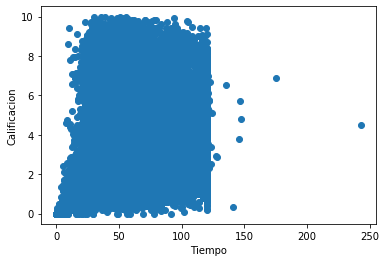

In [3]:
dfExamen = df[['IdEstudiante', 'IdEscuela', 'Grado', 'Calificacion', 'Tiempo', 'IsPrueba']].where(df['IsPrueba']==0)

dfExamen = dfExamen.dropna()
dfExamen.drop_duplicates(keep='first', inplace=True)

#plt.scatter(dfExamen['Tiempo'], dfExamen['Calificacion'], marker = 'x')
#plt.xlabel('Tiempo')
#plt.ylabel('Calificacion')

# scatterplot of inputs data
#dfCalificacionesTiempo = dfExamen[['Tiempo', 'Calificacion']]
plt.scatter(dfExamen['Tiempo'], dfExamen['Calificacion'])
plt.xlabel('Tiempo')
plt.ylabel('Calificacion')


In [4]:
# Acotamos la información
dfCalificacionesTiempo = dfExamen[['Tiempo', 'Calificacion']]
X = dfCalificacionesTiempo.values

Modeling

In [5]:
# Inicializamos el modelo
# Definimos la k en 5, podemos ajustar de acuerdo al modelo
nbrs = NearestNeighbors(n_neighbors = 5)


In [6]:
# Ajustamos el modelo
nbrs.fit(X)

NearestNeighbors()

In [7]:
# Obtenemos distancias e indices de los k-vecinos del modelo
distances, indexes = nbrs.kneighbors(X)
distances,indexes

(array([[0.        , 0.06      , 0.06324555, 0.09055385, 0.15033296],
        [0.        , 0.        , 0.03      , 0.06      , 0.16      ],
        [0.        , 0.04123106, 0.12529964, 0.12649111, 0.14866069],
        ...,
        [0.        , 0.02      , 0.05      , 0.07211103, 0.08062258],
        [0.        , 0.02      , 0.07071068, 0.08944272, 0.1118034 ],
        [0.        , 0.06      , 0.10049876, 0.13152946, 0.2       ]]),
 array([[    0, 20201,  5592,  1227,  6552],
        [ 1751,     1, 22773, 11795,  1056],
        [    2,  6630, 22257, 23072, 11709],
        ...,
        [24123, 13801, 10649, 23883, 16691],
        [24124,  8425,  1341, 20782, 15777],
        [24125,  9698, 15204, 19867, 16912]]))

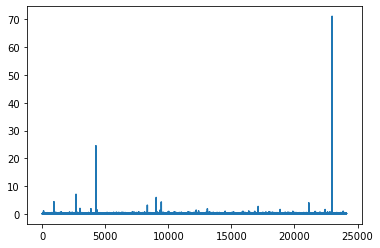

In [8]:
# Graficamos la media de las k-distancias para cada uno de los datos
plt.plot(distances.mean(axis =1))

In [9]:
# Definimos una k-distancia para considerar al dato como outlier, en este caso utilizamos el 2
outlier_index = np.where(distances.mean(axis = 1) > 2)
outlier_index

(array([  933,  2683,  2998,  4261,  8336,  9038,  9442, 17120, 21133,
        22981]),)

In [10]:
# Filtramos outliers
outlier_values = dfCalificacionesTiempo.iloc[outlier_index]
outlier_values

,Tiempo,Calificacion
6318,147.00,4.79
18183,135.63,6.52
20253,9.53,8.59
28875,175.37,6.90
56655,128.32,2.88
61401,140.63,0.33
64167,146.27,5.70
116487,127.50,2.92
143739,145.67,3.80
156327,242.47,4.50


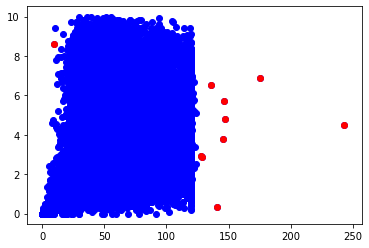

In [11]:
# Graficar datos originales
plt.scatter(dfCalificacionesTiempo["Tiempo"], dfCalificacionesTiempo["Calificacion"], color = "b")
# Graficar outliers
plt.scatter(outlier_values["Tiempo"], outlier_values["Calificacion"], color = "r")